In [ ]:
# Source of the data: 
# https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction

# Sources of the images:
# Clarity Chart : https://www.u7jewelry.com/blogs/jewelry-guide/czcubic-zirconia-vs-diamond
# Color Chart : https://beyond4cs.com/color/choosing-a-diamond-color/
# Girdle Diameter and Table Size Image : https://www.gia.edu/diamond-cut/diamond-cut-anatomy-round-brilliant

In [ ]:
# Regression Algorithms

# Linear Regression
# K-Nearest Neighbors
# Decision Tree
# Random Forest
# Support Vector Machine
# Lasso Regression

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image

# Reading the data
gem_data = pd.read_csv("./cubic_zirconia.csv")

In [2]:
# Exploring the data
gem_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
# Removing the unnecessary index column
gem_data = gem_data.drop("Unnamed: 0", axis=1)

gem_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


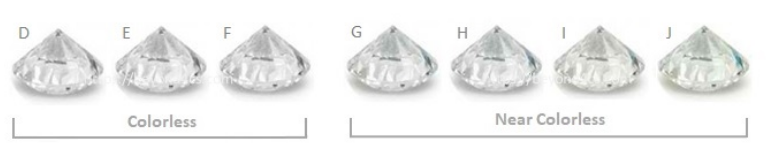

In [88]:
Image(filename='./dictionary/color_chart.png', width=600, height=600)

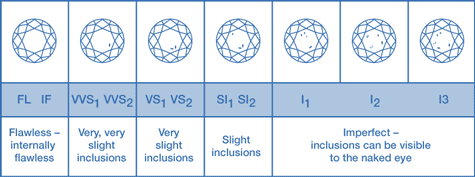

In [90]:
Image(filename='./dictionary/clarity_chart.jpg', width=600, height=600)

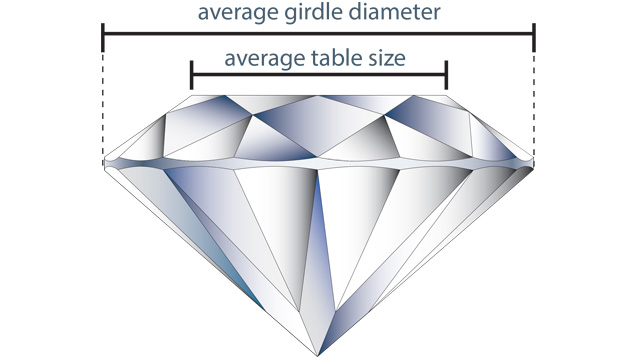

In [91]:
Image(filename='./dictionary/cubic_zirconia.jpg')

### EDA

In [59]:
gem_data.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


<Axes: >

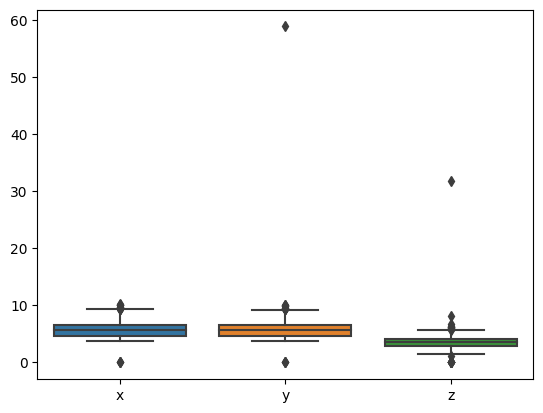

In [60]:
# boxplot for x y z
sns.boxplot(data=gem_data[["x", "y", "z"]])


In [69]:
# get the details of the outliers in y
gem_data[gem_data["y"] > 10]

,carat,cut,color,clarity,depth,table,x,y,z,price
12500,4.50,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,18531
20505,4.01,Premium,I,I1,61.0,61.0,10.14,10.10,6.17,15223
25795,2.00,Premium,H,SI2,58.9,57.0,8.09,58.90,8.06,12210


In [70]:
# we can drop the extreme outlier, which has the y value of 58.9
gem_data_clean = gem_data.copy()
gem_data_clean = gem_data_clean.drop(25795, axis=0)
gem_data_clean[gem_data_clean["y"] > 10]

,carat,cut,color,clarity,depth,table,x,y,z,price
12500,4.50,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,18531
20505,4.01,Premium,I,I1,61.0,61.0,10.14,10.10,6.17,15223


In [71]:
# get the details of the outliers in z
gem_data_clean[gem_data_clean["z"] > 10]

,carat,cut,color,clarity,depth,table,x,y,z,price
344,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.15,31.8,1970


In [72]:
# we can drop the extreme outlier, which has the z value of 
gem_data_clean = gem_data_clean.drop(344, axis=0)
gem_data_clean[gem_data_clean["z"] > 10]

,carat,cut,color,clarity,depth,table,x,y,z,price


<Axes: >

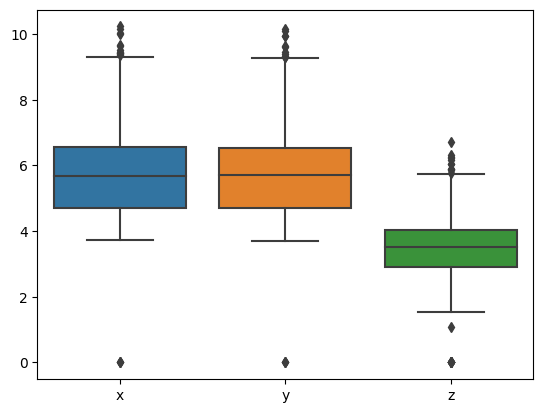

In [77]:
# boxplot for x y z
sns.boxplot(data=gem_data_clean[["x", "y", "z"]])

In [78]:
# get the details of the outliers in x which are less than 1
gem_data_clean[gem_data_clean["x"] < 1]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [79]:
# get the details of the outliers in x which are less than 1
gem_data_clean[gem_data_clean["y"] < 1]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [80]:
# get the details of the outliers in x which are less than 1
gem_data_clean[gem_data_clean["z"] < 1]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [81]:
# drop the observations with x, y, z all equal to 0
gem_data_clean = gem_data_clean.drop(gem_data_clean[(gem_data_clean["x"] == 0) & (gem_data_clean["y"] == 0) & (gem_data_clean["z"] == 0)].index, axis=0)
gem_data_clean[gem_data_clean["z"] < 1]

,carat,cut,color,clarity,depth,table,x,y,z,price
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [82]:
# change empty values of z which are equal to 0 to NA
gem_data_clean["z"] = gem_data_clean["z"].replace(0, np.nan)

<Axes: xlabel='cut', ylabel='price'>

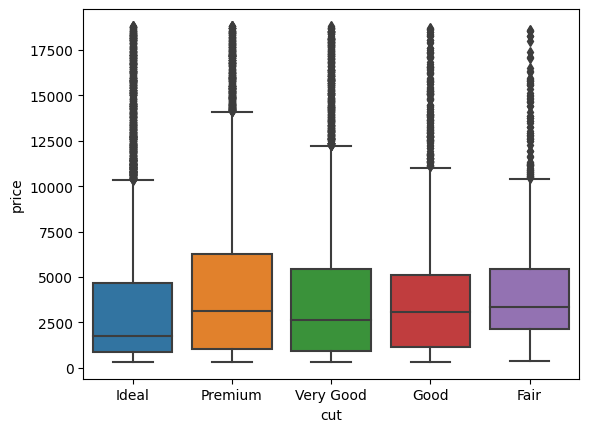

In [74]:
# boxplots for the price variable vs cut
sns.boxplot(x="cut", y="price", data=gem_data_clean)

<Axes: xlabel='color', ylabel='price'>

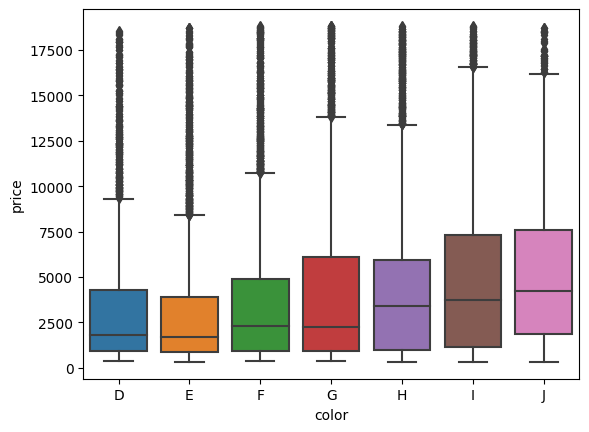

In [100]:
# boxplots for the price variable vs color, sorted by alphabetical order
sns.boxplot(x="color", y="price", data=gem_data_clean, order=["D", "E", "F", "G", "H", "I", "J"])

In [119]:
# create a color map for visualization in hexadecimal code for the color variable
color_map = {"D": "#9000A0", "E": "#0000FF", "F": "#00FFFF", "G": "#00FF00", "H": "#FFFF00", "I": "#FFA500", "J": "#FF0000"}

<Axes: ylabel='color'>

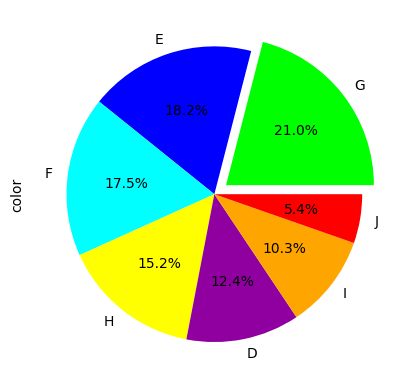

In [122]:
# sort the color map by count of each color
color_map_sorted = {k: v for k, v in sorted(color_map.items(), key=lambda item: gem_data_clean["color"].value_counts()[item[0]], reverse=True)}

# pie chart for the color variable that shows the percentage of each color, explode increases to show the difference between the colors using the color values from the color map
gem_data_clean["color"].value_counts().plot.pie(explode=[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], colors=color_map_sorted.values(), autopct='%1.1f%%')

<Axes: xlabel='carat', ylabel='price'>

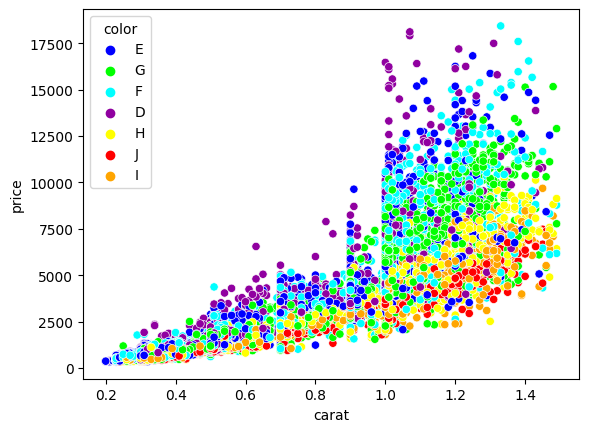

In [123]:
# chart of size vs colored by color column limit the carat column to 1.5 colored by color map dictionary
sns.scatterplot(x="carat", y="price", data=gem_data_clean[gem_data_clean["carat"] < 1.5], hue="color", palette=color_map)

<Axes: xlabel='carat', ylabel='price'>

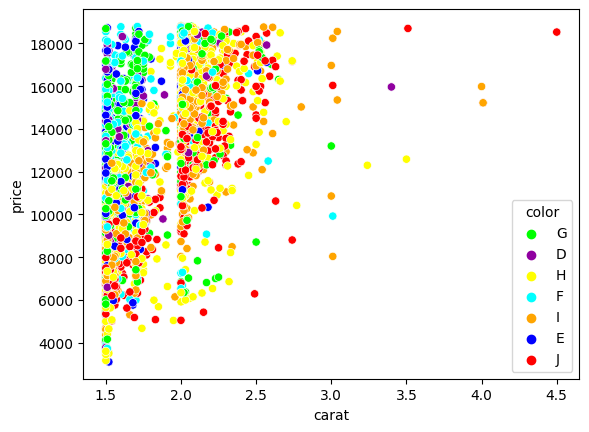

In [125]:
# chart of size vs colored by color column limit the carat column to greater than 1.5 colored by color map dictionary
sns.scatterplot(x="carat", y="price", data=gem_data_clean[gem_data_clean["carat"] >= 1.5], hue="color", palette=color_map)

### Imputing the missing values

In [126]:
# Checking for null values
gem_data_clean.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      696
table        0
x            0
y            0
z            6
price        0
dtype: int64

<Axes: >

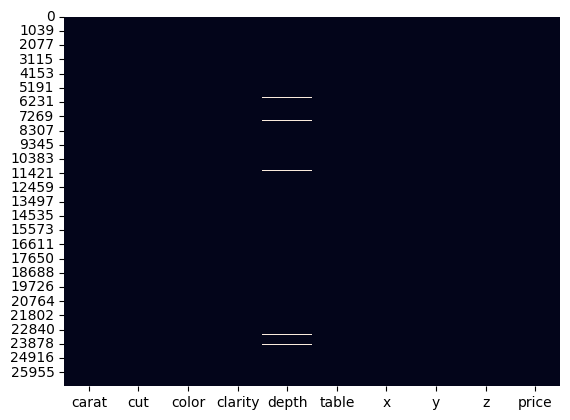

In [127]:
# Missingness map
sns.heatmap(gem_data_clean.isnull(), cbar=False)

#### Imputing column "Z"

In [ ]:
# 

In [41]:
# Option 1: Imputing with the mean
gem_data_mean = gem_data.copy()
print(gem_data_mean["depth"].mean())
gem_data_mean["depth"] = gem_data_mean["depth"].fillna(gem_data_mean["depth"].mean())


61.74514655500572


In [42]:
# Option 2: Imputing with the median
gem_data_median = gem_data.copy()
print(gem_data_median["depth"].median())
gem_data_median["depth"] = gem_data_median["depth"].fillna(gem_data_median["depth"].median())

61.8


In [28]:
# Option 3: Imputing using machine learning algorithms, such as KNN
gem_data_knn = gem_data.copy()
# Before using KNN, we need to convert the categorical variables to 0s and 1s by using one-hot encoding
gem_data_knn = pd.get_dummies(gem_data_knn, columns=["cut", "color", "clarity"])
gem_data_knn.head()

# knn imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
gem_data_knn_imputed = imputer.fit_transform(gem_data_knn)
gem_data_knn_imputed = pd.DataFrame(gem_data_knn_imputed, columns=gem_data_knn.columns)

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Text(0.5, 1.0, 'KNN Imputation')

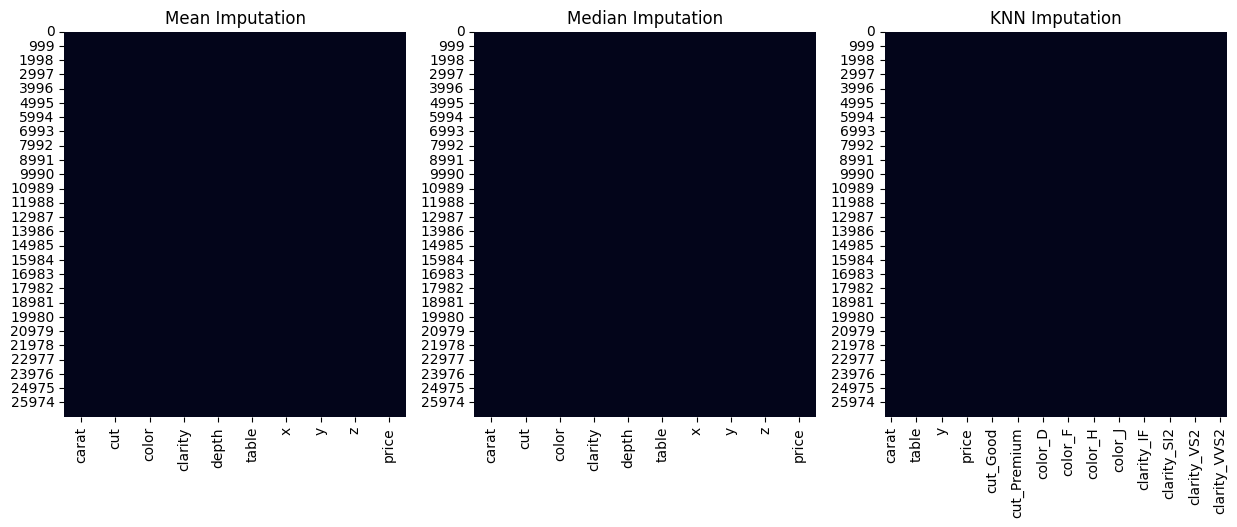

In [43]:
# missingness map for all three imputed datasets multiplot grid
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(gem_data_mean.isnull(), cbar=False, ax=axes[0])
axes[0].set_title("Mean Imputation")
sns.heatmap(gem_data_median.isnull(), cbar=False, ax=axes[1])
axes[1].set_title("Median Imputation")
sns.heatmap(gem_data_knn_imputed.isnull(), cbar=False, ax=axes[2])
axes[2].set_title("KNN Imputation")

C:\Users\mehme\AppData\Local\Temp\ipykernel_14220\2739432945.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gem_data_mean.corr(), ax=axes[0])
C:\Users\mehme\AppData\Local\Temp\ipykernel_14220\2739432945.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gem_data_median.corr(), ax=axes[1])


Text(0.5, 1.0, 'KNN Imputation')

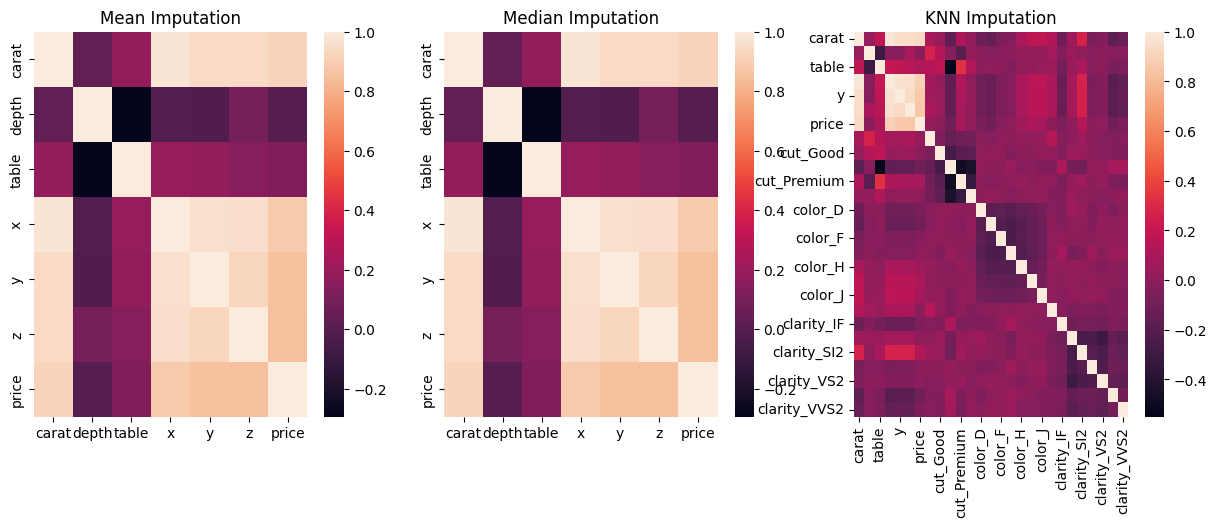

In [44]:
# heatmap for the correlation matrix for all three imputed datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(gem_data_mean.corr(), ax=axes[0])
axes[0].set_title("Mean Imputation")
sns.heatmap(gem_data_median.corr(), ax=axes[1])
axes[1].set_title("Median Imputation")
sns.heatmap(gem_data_knn_imputed.corr(), ax=axes[2])
axes[2].set_title("KNN Imputation")